
# How the profits of the largest companies in the US changed historically

### Data set Setup

In [28]:
# Start off with a code cell for imports and setup, for easy editing and re-run of the cell without causing any side-effects
# matplotlib is a line magic to instruct Jupyter to capture Matplotlib plots and render them in the cell output.

import csv
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='darkgrid')

### Import CSV file in Pandas and load the data






In [29]:
df = pd.read_csv('fortune500.csv')

### Investigate the data set 


In [30]:
# To display the DataFrame with the CSV data

df

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
...,...,...,...,...,...
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6


In [31]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [32]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [33]:
# Rename the column

df.columns = ['year','rank','company','revenue','profit']

In [34]:
# To check if the data set is complete - 500 rows for each year from 1955 to 2005

len(df)

25500

In [35]:
# To check the different data types

df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [36]:
# The profit column is in obj type instead of float64. It seems the profit column has some non integer values. 
# To check: 

non_numeric_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [37]:
# The result above shows there are non-numeric profit (values are strings) which indicate missing data.
# To check if there are other strings asides 'N.A.'

set(df.profit[non_numeric_profits])

{'N.A.'}

In [38]:
# It shows the set contains only "N.A.' as the unique non_numeric_profit value
# To determine the next step, we need to know how many values are missing ('N.A.').

len(df.profit[non_numeric_profits])

369

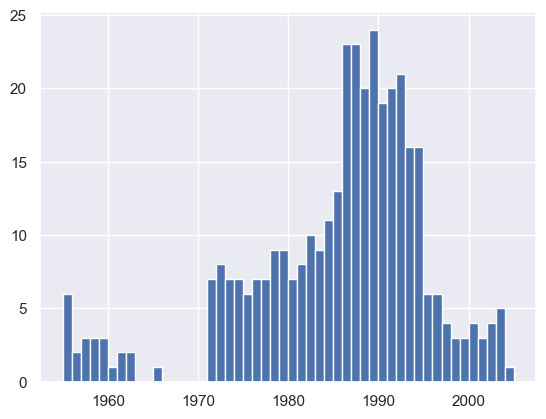

In [39]:
# This value equates to 1.45% (369/25500) of the data set.
# Although this is a small fration of the data set, it is not completely insignificant.
# We need to check if the rows containing 'N.A.' is uniformly distributed over the years.
# If it is, the easiest soluton would be to remove them.
# Let's make a distribution:

bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2006))

In [53]:
# From the chart above, All invalid values in each year were less than 25. 
# There are 500 rows (or data points) per year, if the N.A. values are removed, it will account for less than 5% (25/500) of the data for the worst years.
# Asides from the spike in the 90s (approx. 1985-1995), most years have less than half the peak value (<12.5) of the N.A.s per year.
# For this case, let's assume it is acceptable to remoe the values:

df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [54]:
# To check if it works, let's check the length of the updated data set

len(df)

25131

In [55]:
# Let's check the data types:

df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [56]:
# _Notes_
# The data Setup is complete!! To present the notebook as a report, we could get rid of the investigatory cells that was created
# (which were included as a demonstration to show the flow of work in the notebooks),
# and merge relevant cells  to create a single data set Setup cell.
# See the Advanced Functionalty section to learn more

### Plotting with matplotlib

In [61]:
# Now that the Setup is complete, we can address the question.
# Plot the average profit by year and average revenue by year.
# First, we will define our variables and also find a way to reduce the code:

group_by_year = df.loc[:,['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)
    

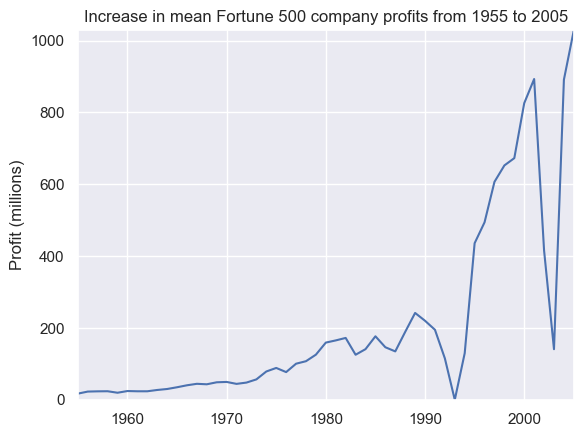

In [63]:
# Let's plot:

fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')


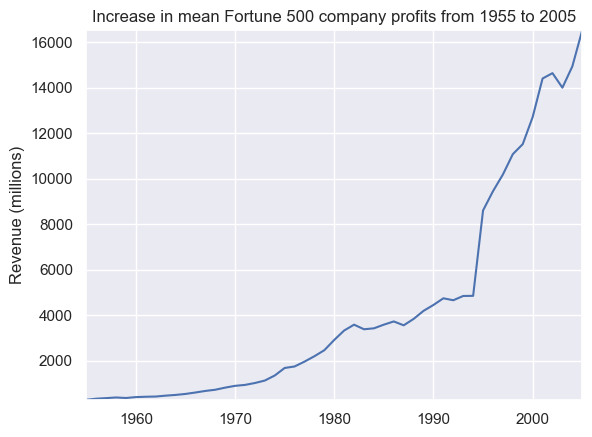

In [65]:
# The chart above shows an exponential trend but it has some dips.
# This dips might correspond to the early 1990s recession and the dot-com bubble.
# It's surprising to see the profit recover so quickly to higher levels after each recession.
# Let's find out what might be responsible using the revenue data
# Plot the graph of the revenue:

y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Revenue (millions)')


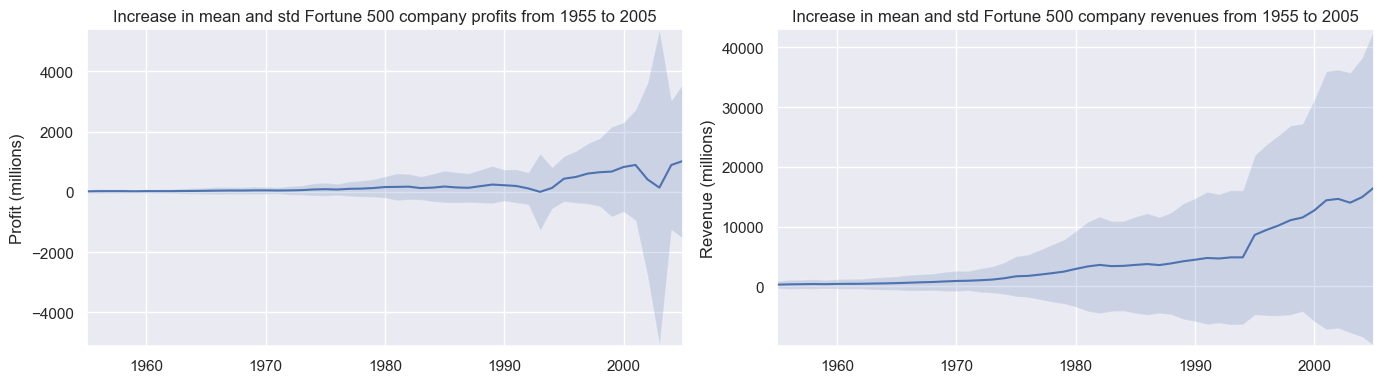

In [66]:
# This means Revenue were not as badly hit as the Profit (The Finance department did an excellent Accounting work).

# To superimpose the plots with +/- their standard deviations:

def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()


In [67]:
# From the charts above, we see the standard deviations are huge. 
# It shows some Fortune 500 companies make billions while others lose billions. And this risk increased over time in tandem with rising profits over the years.

### Other analysis can be performed to get more insights

In [68]:
#Trends in Revenue and Profitability:
# - If some companies perform better than the others, are the profits of the top 10% more or less volatile than the bottom 10%?
# - what percent of the companies performed really well?
# - which industries have consistently shown growth and which have faced challenges?

#Industry Evolution:
# - Observe shifts in the composition of industries within the Fortune 500 list over time.
# - Identify emerging industries that have gained prominence and declining ones.
# - Explore factors contributing to industry changes, such as technological advancements or market shifts.

#Industry Performance:
# - Analyze the performance of different industries over time to identify those that consistently outperformed or struggled.
# - Determine whether certain industries are more cyclical or resilient to economic fluctuations.

#Market Leaders:
# - Identify the companies that consistently ranked at the top of the Fortune 500 list in terms of revenue and profit.
# - Analyze the strategies and factors that contributed to their sustained leadership.

#Corporate Strategies:
# - Study the strategies adopted by companies to drive revenue and profit growth, including product diversification, geographic expansion, and cost-cutting measures.

#Financial Crises:
# - Examine how major financial crises, such as the 2008 global financial crisis, impacted the revenues and profits of Fortune 500 companies.
# - Identify companies that were resilient during economic downturns.